In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=256, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb]) # 교재에서는 배치사이즈 64

Epoch 1/100
79/79 [==============================] - 13s 95ms/step - loss: 0.6931 - accuracy: 0.5045 - val_loss: 0.6930 - val_accuracy: 0.5148
Epoch 2/100
 1/79 [..............................] - ETA: 7s - loss: 0.6932 - accuracy: 0.4766

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


79/79 [==============================] - 5s 62ms/step - loss: 0.6928 - accuracy: 0.5286 - val_loss: 0.6927 - val_accuracy: 0.5350
Epoch 3/100
79/79 [==============================] - 5s 61ms/step - loss: 0.6925 - accuracy: 0.5559 - val_loss: 0.6924 - val_accuracy: 0.5420
Epoch 4/100
79/79 [==============================] - 6s 78ms/step - loss: 0.6921 - accuracy: 0.5630 - val_loss: 0.6920 - val_accuracy: 0.5598
Epoch 5/100
79/79 [==============================] - 5s 58ms/step - loss: 0.6916 - accuracy: 0.5778 - val_loss: 0.6914 - val_accuracy: 0.5922
Epoch 6/100
79/79 [==============================] - 5s 70ms/step - loss: 0.6909 - accuracy: 0.6097 - val_loss: 0.6906 - val_accuracy: 0.6092
Epoch 7/100
79/79 [==============================] - 5s 59ms/step - loss: 0.6900 - accuracy: 0.6199 - val_loss: 0.6895 - val_accuracy: 0.6250
Epoch 8/100
79/79 [==============================] - 7s 89ms/step - loss: 0.6886 - accuracy: 0.6319 - val_loss: 0.6880 - val_accuracy: 0.6214
Epoch 9/100
79/79 

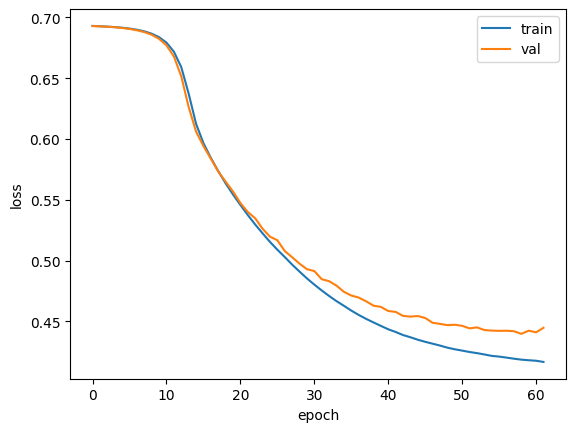

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [7]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=256, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb]) # 교재에서는 배치사이즈 64

Epoch 1/100
79/79 [==============================] - 9s 90ms/step - loss: 0.6929 - accuracy: 0.5084 - val_loss: 0.6930 - val_accuracy: 0.5160
Epoch 2/100
79/79 [==============================] - 6s 73ms/step - loss: 0.6926 - accuracy: 0.5336 - val_loss: 0.6928 - val_accuracy: 0.5300
Epoch 3/100
79/79 [==============================] - 9s 116ms/step - loss: 0.6924 - accuracy: 0.5468 - val_loss: 0.6926 - val_accuracy: 0.5380
Epoch 4/100
79/79 [==============================] - 5s 66ms/step - loss: 0.6921 - accuracy: 0.5516 - val_loss: 0.6923 - val_accuracy: 0.5434
Epoch 5/100
79/79 [==============================] - 6s 74ms/step - loss: 0.6918 - accuracy: 0.5692 - val_loss: 0.6920 - val_accuracy: 0.5610
Epoch 6/100
79/79 [==============================] - 6s 71ms/step - loss: 0.6915 - accuracy: 0.5754 - val_loss: 0.6917 - val_accuracy: 0.5678
Epoch 7/100
79/79 [==============================] - 8s 107ms/step - loss: 0.6910 - accuracy: 0.5817 - val_loss: 0.6912 - val_accuracy: 0.5776
Epoc

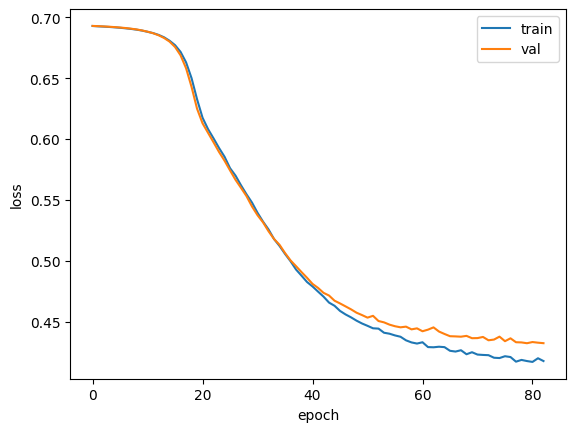

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [11]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=256, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb]) # 교재에서는 배치사이즈 64

Epoch 1/100
79/79 [==============================] - 16s 153ms/step - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6931 - val_accuracy: 0.5096
Epoch 2/100
79/79 [==============================] - 10s 128ms/step - loss: 0.6930 - accuracy: 0.5102 - val_loss: 0.6931 - val_accuracy: 0.5054
Epoch 3/100
79/79 [==============================] - 9s 119ms/step - loss: 0.6930 - accuracy: 0.5092 - val_loss: 0.6930 - val_accuracy: 0.5108
Epoch 4/100
79/79 [==============================] - 10s 128ms/step - loss: 0.6928 - accuracy: 0.5128 - val_loss: 0.6928 - val_accuracy: 0.5222
Epoch 5/100
79/79 [==============================] - 10s 128ms/step - loss: 0.6927 - accuracy: 0.5189 - val_loss: 0.6927 - val_accuracy: 0.5206
Epoch 6/100
79/79 [==============================] - 10s 131ms/step - loss: 0.6925 - accuracy: 0.5239 - val_loss: 0.6925 - val_accuracy: 0.5334
Epoch 7/100
79/79 [==============================] - 10s 122ms/step - loss: 0.6923 - accuracy: 0.5438 - val_loss: 0.6922 - val_accuracy: 

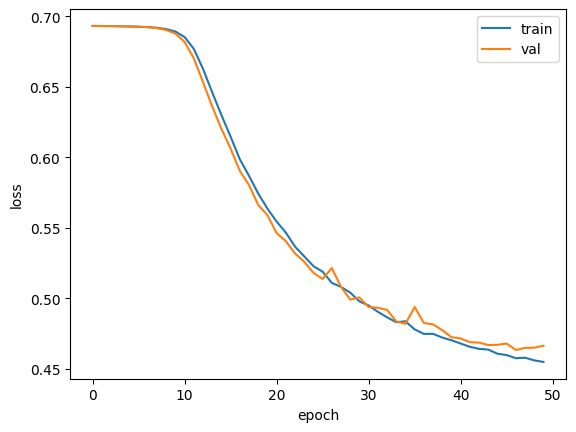

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [16]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=256, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb]) # 교재에서는 배치사이즈 64

Epoch 1/100
79/79 [==============================] - 9s 74ms/step - loss: 0.6928 - accuracy: 0.5189 - val_loss: 0.6928 - val_accuracy: 0.5330
Epoch 2/100
 2/79 [..............................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5586

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


79/79 [==============================] - 6s 79ms/step - loss: 0.6922 - accuracy: 0.5408 - val_loss: 0.6922 - val_accuracy: 0.5382
Epoch 3/100
79/79 [==============================] - 5s 63ms/step - loss: 0.6915 - accuracy: 0.5543 - val_loss: 0.6916 - val_accuracy: 0.5498
Epoch 4/100
79/79 [==============================] - 6s 81ms/step - loss: 0.6908 - accuracy: 0.5645 - val_loss: 0.6909 - val_accuracy: 0.5606
Epoch 5/100
79/79 [==============================] - 5s 63ms/step - loss: 0.6900 - accuracy: 0.5741 - val_loss: 0.6901 - val_accuracy: 0.5638
Epoch 6/100
79/79 [==============================] - 6s 73ms/step - loss: 0.6890 - accuracy: 0.5810 - val_loss: 0.6892 - val_accuracy: 0.5690
Epoch 7/100
79/79 [==============================] - 5s 68ms/step - loss: 0.6880 - accuracy: 0.5847 - val_loss: 0.6881 - val_accuracy: 0.5724
Epoch 8/100
79/79 [==============================] - 5s 65ms/step - loss: 0.6868 - accuracy: 0.5900 - val_loss: 0.6871 - val_accuracy: 0.5754
Epoch 9/100
79/79 

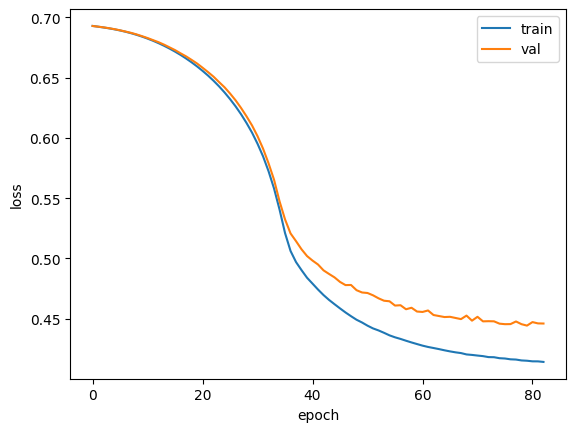

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()